# Solutions 04

**Due:** 2018-03-15, 11:59 PM, as a Jupyter notebook (with related files) submitted via your repo in the course GitHub organization.  Edit the provided Solutions04 notebook with your solutions.

## 1. Enhancing the *UnivariateBayesianInference* class

The assignment directory includes a `univariate_bayes.py` file that implements a `univariate_bayes` module with a single class, `UnivariateBayesianInference`; this code was introduced in Lab06.  This class is meant to be used as a **base class** that is inherited by a subclass written to solve univariate inference problems with a specific type of likelihood function and data.  Lab06 provided examples for binomial and Poisson cases.  For this problem, you will enhance the capabilities of `UnivariateBayesianInference`.

Your repo also has a `binomial_poisson.py` file, also meant to be used as module, with two classes that subclass `UnivariateBayesianInference`:  `BinomialInference` and `PoissonRateInference`.  We discussed and used these classes in Lab06.  There we created instances of those classes in the same file that defined them; here, you'll import the classes from the module and work with them in your solutions notebook.

### Problem 1.1 (2 points):

> Add two new methods to `UnivariateBayesianInference` in `univariate_bayes.py`:
* `mean()`, computing the posterior mean of the value of the parameter by quadrature
* `std()`, computing the posterior standard deviation by quadrature

> You may use quadrature functions in `NumPy` or `SciPy`. Be sure to maintain docstrings:  revise the module docstring to note that you have revised the module's code, and provide docstrings for each new method.

### Problem 1.2 (2 points):

> Test the methods by creating one instance each of `PoissonRateInference` and `BinomialInference` in your solution notebook (with input arguments of your choosing) and comparing your quadrature-based mean and standard deviation posterior summaries with analytical formulas presented in lectures.  Do the comparison by calculating the percentage difference between the quadrature-based and formula-based results and displaying the the results and percentage differences in the notebook.

> #### Solution:

In [1]:
import numpy as np
from scipy import stats
from univariate_bayes import UnivariateBayesianInference

In [2]:
# Poisson
from binomial_poisson import PoissonRateInference

# Create one instance of PoissonRateInference
T, n = 2, 16
r_u = 100. 
alpha_ga = 1
lambda_ga = 10.
gamma1 = stats.gamma(alpha_ga, scale=lambda_ga) # gamma prior
poil = PoissonRateInference(T, n, gamma1.pdf, r_u)

# Calculate quadrature-based mean and standard deviation
poi_mean_quad = poil.mean()
poi_std_quad = poil.std()

# Calculate mean and standard deviation based on analytical formulas
# Gamma posterior
alpha_ga_post = alpha_ga+n
lambda_ga_post = lambda_ga/(lambda_ga*T+1)
poi_mean_analyt = alpha_ga_post*lambda_ga_post
poi_std_analyt = np.sqrt(lambda_ga_post**2*alpha_ga_post)

# Calculate percentage difference
poi_diff_mean = (poi_mean_quad-poi_mean_analyt)/poi_mean_analyt*100
poi_diff_std = (poi_std_quad-poi_std_analyt)/poi_std_analyt*100

# Summary
print("\033[1m"+"Summary of PoissonRateInference"+"\033[0;0m")

print ("                      Quadrature_based mean:",poi_mean_quad)
print ("              Analytical formula-based mean:",poi_mean_analyt)
print ("                                 Difference:",poi_diff_mean, "%")
print ("")
print ("        Quadrature_based standard deviation:",poi_std_quad)
print ("Analytical formula-based standard deviation:",poi_std_analyt)
print ("                                 Difference:",poi_diff_std, "%")

Summary of PoissonRateInference
                      Quadrature_based mean: 8.09523809524
              Analytical formula-based mean: 8.095238095238095
                                 Difference: -1.53602620819e-12 %

        Quadrature_based standard deviation: 1.96338363125
Analytical formula-based standard deviation: 1.96338363125
                                 Difference: -3.06481560593e-12 %


In [3]:
# Binomial
from binomial_poisson import BinomialInference

# Create one instance of BinomialInference
n, n_trials = 8, 12
a, b = .5, .5
beta_half = stats.beta(a=a, b=b) # Beta prior
binl = BinomialInference(n, n_trials, beta_half.pdf, arange=(1.e-4, 1 - 1.e-4))

# Calculate quadrature-based mean and standard deviation
bin_mean_quad = binl.mean()
bin_std_quad = binl.std()

# Calculate mean and standard deviation based on analytical formulas
# Beta posterior
a_post = n+a;
b_post = n_trials-n+b;
bin_mean_analyt = a_post/(a_post+b_post)
bin_std_analyt = np.sqrt(a_post*b_post/((a_post+b_post)**2*(a_post+b_post+1)))

# Calculate percentage difference
bin_diff_mean = (bin_mean_quad-bin_mean_analyt)/bin_mean_analyt*100
bin_diff_std = (bin_std_quad-bin_std_analyt)/bin_std_analyt*100

# Summary
print("\033[1m"+"Summary of BinomialInference"+"\033[0;0m")

print ("                      Quadrature_based mean:",bin_mean_quad)
print ("              Analytical formula-based mean:",bin_mean_analyt)
print ("                                 Difference:",bin_diff_mean, "%")
print ("")
print ("        Quadrature_based standard deviation:",bin_std_quad)
print ("Analytical formula-based standard deviation:",bin_std_analyt)
print ("                                 Difference:",bin_diff_std, "%")

Summary of BinomialInference
                      Quadrature_based mean: 0.653846154081
              Analytical formula-based mean: 0.6538461538461539
                                 Difference: 3.59397361544e-08 %

        Quadrature_based standard deviation: 0.127147653745
Analytical formula-based standard deviation: 0.127147653466
                                 Difference: 2.19669363196e-07 %


## 2. Inference with the Cauchy distribution

In Lab06 and Problem 1 the `UnivariateBayesianInference` base class was used to numerically compute results for inferences that we can handle analytically.  But this base class can also be used for problems that are not analytically tractable.  In this problem, you'll use it to do inference with data modeled with a **Cauchy distribution**.

The Cauchy distribution has an undefined mean and an infinite variance.  It is troublesome to work with in frequentist statistics.  Even it's maximum likelihood estimator has complicated sampling properties that pose not just computational challenges, but conceptual ones (the best frequentist methods require adopting the *conditional frequentist approach* briefly mentioned in Lecture 5 when we discussed the likelihood principle).  In Bayesian inference, it poses no conceptual difficulties, but it must be handled numerically.

The Cauchy distribution is known in physics as the Lorentzian distribution, where in certain circumstances it describes the profile of spectral lines, and the distribution of particle mass peaks in accelerator experiments.  It appears in problems where the ratio of two quantities with normal errors is of interest; when the quantities are uncorrelated with zero mean, the PDF for the ratio is a Cauchy distribution.  The Student's-$t$ distribution with 1 degree of freedom is a Cauchy distribution.  It also arises in geometric inference problems, as you will see in this problem.

You can find basic information about the Cauchy distribution [on Wikipedia](http://en.wikipedia.org/wiki/Cauchy_distribution) and in the [NIST Engineering Statistics Handbook](http://www.itl.nist.gov/div898/handbook/eda/section3/eda3663.htm).

### Problem 2.1 (2 points):

A small lump of weakly radioactive material is a distance $d$ behind a 1-dimensional sensor placed on a barrier, but at an unknown position, $x_0$, along the sensor.  The sensor records the locations of $N$ gamma rays emitted by the lump, denoted $x_i$ (for $i=1$ to $N$).  We'll assume that $d$ is small compared to the length of the sensor, so that the sensor may be considered essentially infinite in length.

<img src="CauchyGeometry.png"/>

> Assume the lump emits gamma rays isotropically.  Show that the PDF for the detected location of a single gamma ray is a Cauchy distribution with location parameter $x_0$ and scale parameter $d$.  You'll need to use the PDF transformation rule described in the lab session; for online presentations on this topic, see:
* [Lesson 22: Functions of One Random Variable – PSU STAT 414 / 415](https://onlinecourses.science.psu.edu/stat414/node/128)
* [Probability/Transformation of Probability Densities – Wikibooks](https://en.wikibooks.org/wiki/Probability/Transformation_of_Probability_Densities#Function_of_a_Random_Variable_(n=1,_m=1))

> #### Solution:

> The lump emits gamma rays isotopically. We can assume that the distribution of the gamma ray direction is uniform. Notice that here we only care about the direction in which the gamma ray will eventually hit the $x$ axis, i.e.,$-\frac{\pi}{2} < \theta < \frac{\pi}{2}$. So the PDF of the gamma ray direction $\theta$, denoted as $f(\cdot)$, can be expressed as 
$$
p(\theta) = f(\theta) =  \frac{1}{\frac{\pi}{2}-(-\frac{\pi}{2})}= \frac{1}{\pi}. 
$$
According to the geometry,
$$
\tan(\theta) = \frac{|x-x_0|}{d}\ \ \Rightarrow\ \ \theta = \Theta(x) = \arctan \frac{|x-x_0|}{d},
$$
i.e., the gamma ray direction, $\theta$, can be expressed as a function, denoted as $\Theta(\cdot)$, of the location of the gamma ray emitted by the lump, $x$.
Therefore, according to the PDF transformation rule, the PDF of $x$, denoted as $g(\cdot)$, is
$$
g(x) = f(\Theta(x))\cdot |\Theta'(x)| = \frac{1}{\pi}\cdot \Bigg{|}\frac{1}{1+\left(\frac{|x-x_0|}{d}\right)^2}\cdot \frac{1}{d} \Bigg{|} = \frac{1}{\pi d}\frac{d^2}{(x-x_0)^2+d^2}.
$$
We can see that the PDF for the detected location of a single gamma ray, $x$, is a Cauchy distribution with location parameter $x_0$ and scale parameter $d$, i.e.,
$$
p(x|x_0,d) = \frac{1}{\pi d}\frac{d^2}{(x-x_0)^2+d^2}.
$$


### Problem 2.2 (5 points):

Implement and demonstrate inference for the Cauchy location parameter, $x_0$:

> * Create a Python module `cauchy` with a class `CauchyLocationInference` that implements inference for the location of Cauchy-distributed data with a known scale parameter.
* In the notebook, define a function with signature `cauchy_case(x0, d, N, plot=True)` that does the following:
    1. Use `scipy.stats.cauchy` to simulate a dataset of size `N` from a Cauchy distribution with location and scale `x0` and `d`.
    2. Create an instance of your `CauchyLocationInference` class for inferring `x0` with the simulated data.
    3. If the `plot` argument is True, plot the PDF for `x0`.
    4. If the `plot` argument is True, show the posterior mean for `x0` on the plot by computing the mean with the `mean()` method, evaluating the PDF at that value, and plotting a marker on the curve just plotted in step 3.
    5. Return 2 (scalar) values: the value of the posterior mean, and the mean value of the samples in the simulated dataset.
* Run the function 5 times, with the same arguments, to produce a single plot with 5 example posterior PDFs.  Choose values for `x0` and `d` as you wish.  Use a small sample size (say, $N=5$).  Be sure to label all plot axes in this exercise, and feel free to adjust plot parameters (axis limits, line widths, etc.) to help communicate the results.

> #### Solution:

Text(0.5,1,'$x_0$=0, d=2, N=5')

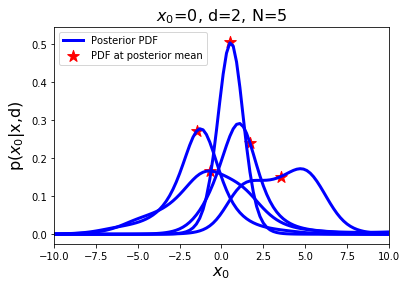

In [4]:
import numpy as np
import scipy
from scipy import stats
from scipy.stats import cauchy
import matplotlib.pyplot as plt
import random

from cauchy import CauchyLocationInference

plt.ion()

# Define a function with signature cauchy_case(x0, d, N, plot=True)
def cauchy_case(x0, d, N, plot=True):
    """
    Create a Cauchy case to implement inference for the location
    of Cauchy-distributed data with a known scale parameter
    """
    
    # Simulate a dataset of size N from a Cauchy distribution 
    # with location and scale x0 and d
    x = cauchy.rvs(loc=x0,scale=d,size=N)
    
    # Define prior
    prior_u, prior_l = 1e3, -1e3
    flatprior_pdf = 1. / (prior_u - prior_l)
    
    # Cauchy location inference
    cauchyl = CauchyLocationInference(d,x,flatprior_pdf)
    
    # Plot PDF for x0
    if plot:
        cauchyl.plot()
        plt.xlim((-10, 10))
        plt.xlabel('$x_0$',fontsize=16)
        plt.ylabel('p($x_0$|x,d)',fontsize=16)
      
    # Compute the posterior mean 
    post_mean = cauchyl.mean()
    
    # Evaluate the PDF at mean
    l_at_mean = cauchyl.lfunc(np.array([post_mean]))
    post_at_mean = l_at_mean*flatprior_pdf/cauchyl.mlike
    
    # Plot a marker at posterior mean
    if plot:
        plt.scatter(post_mean,post_at_mean,marker="*",s=150,color="red")
    
    # Return 2 (scalar) values: 
    # 1. the value of the posterior mean, 
    # 2. the mean value of the samples in the simulated dataset
    return(post_mean,np.mean(x))
    
# Run the function 5 times with the same arguments
# to produce a single plot with 5 example posterior PDFs
x0 = 0;
d = 2;
N = 5;
cauchy_post = cauchy_case(x0,d,N)
plt.legend(['Posterior PDF','PDF at posterior mean'])
for i in range(1,5):
    cauchy_post = cauchy_case(x0,d,N)
plt.title('$x_0$=0, d=2, N=5',fontsize=16)

### Problem 2.3 (2 points):

Means of one kind or another (e.g., arithmetic or weighted) are often used to estimate parameters from a sample of measurements modeled with IID sampling uncertainties.  The **central limit theorem** (CLT) provides a motivation for this.  It shows that, for large sample sizes $N$, and when the sampling distribution has a finite variance, the sample mean has a PDF that converges to a normal distribution with a standard deviation that shrinks with sample size $\propto 1/\sqrt{N}$.

The Cauchy distribution does *not* have a finite variance; as a consequence, the CLT does not hold for the sample mean when the samples are from a Cauchy distribution.  Show this numerically:

> * Run your `cauchy_case` function many times (say, 1000, but use fewer for debugging!), with `plot=False`, collecting the posterior means and the sample means in separate arrays.  Use a largish sample size, say, $N=50$ or $100$.
* Use matplotlib's `hist` function to plot histograms of the posterior means and sample means.  Use the `normed` parameter to plot the histograms normalize as piecewise-constant PDFs.  You can use the `alpha` (opacity) argument to make regions of overlap easier to discern.  Feel free to change the number of bins from the default value.
* Plot the Cauchy PDF for a single observation as a solid curve on the same plot.
* Comment on what the plot reveals about the behavior of the sample mean.

> #### Solution:

In [5]:
N = 50
n_test = 1000

post_mean_test = np.array([]) # used to collect posterior means
sample_mean_test = np.array([]) # used to collect sample means

for i in range(1,n_test+1):
    cauchy_testcase = cauchy_case(x0,d,N,plot=False)
    post_mean_test = np.append(post_mean_test,cauchy_testcase[0])
    sample_mean_test = np.append(sample_mean_test,cauchy_testcase[1]) 

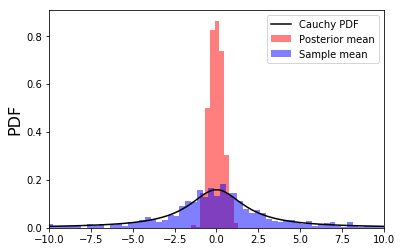

In [6]:
# Plot histograms of the posterior means and sample means
plt.hist(post_mean_test,bins=10,normed=True,color='red',alpha=0.5,label='Posterior mean')
plt.hist(sample_mean_test,bins=4000,normed=True,color='blue',alpha=0.5,label='Sample mean')

# Plot the Cauchy PDF for a single observation 
obs = np.linspace(-10000,10000,100000)
obs_pdf = 1/(np.pi*d)*d**2/((obs-x0)**2+d**2)
plt.plot(obs,obs_pdf,color='black',label='Cauchy PDF')

plt.xlim((-10, 10))
plt.ylabel('PDF',fontsize=16)
plt.legend()

> From the plot we can see that the distribution of the posterior mean seems to satisfy a normal distribution and is more concentrated near the true value. However, the distribution of the sample mean satisfies the original Cauchy distribution instead of a normal distribution. It has longer tails on both sides. The central limit theorem (CLT) does not hold for the sample mean when the samples are from a Cauchy distribution. In this case, it is not a good idea to use the sample mean to estimate the parameter, which is similar to use one sample mean as the estimation -- the accuracy of estimation somehow depends on luck.